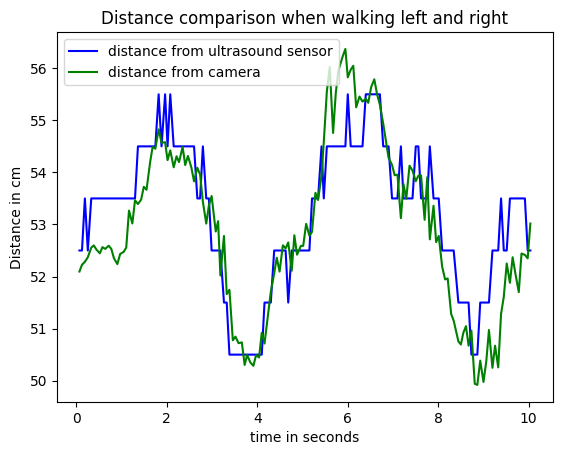

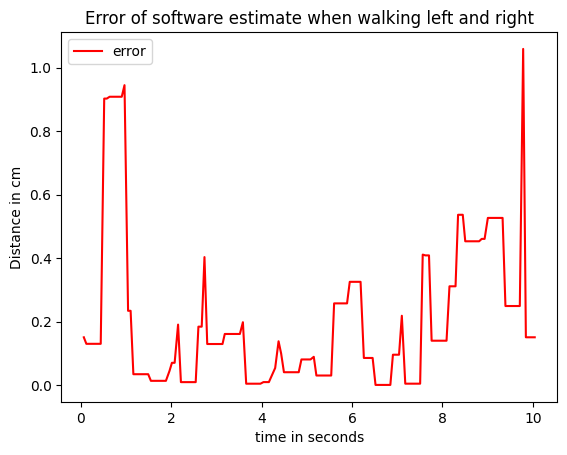

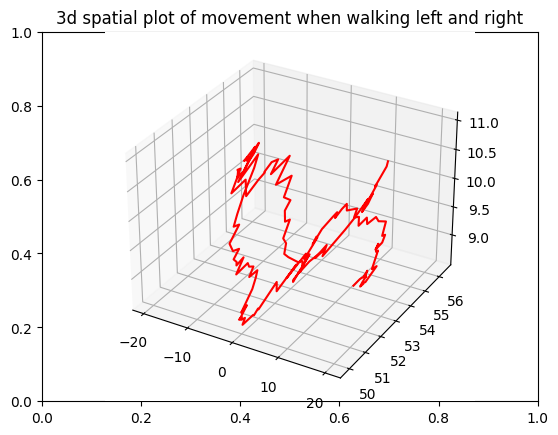

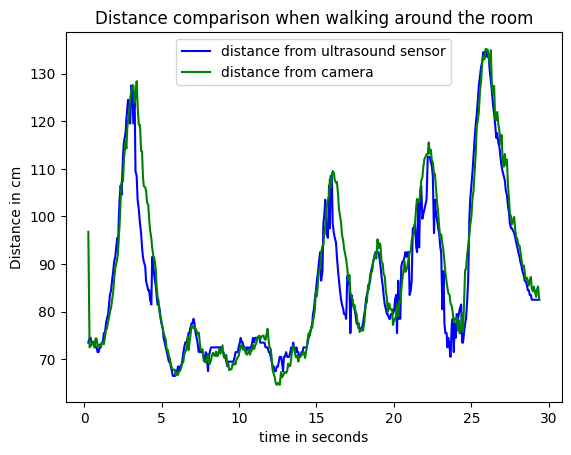

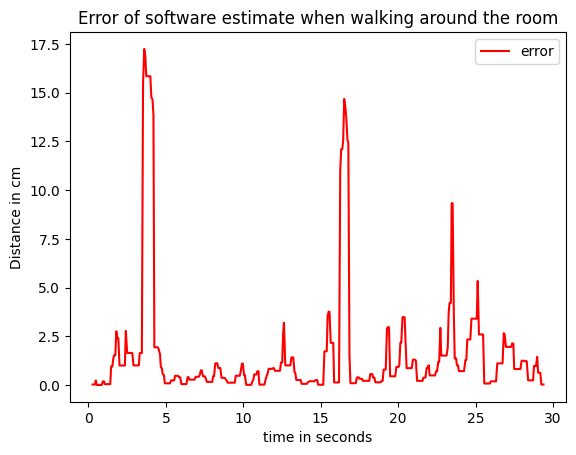

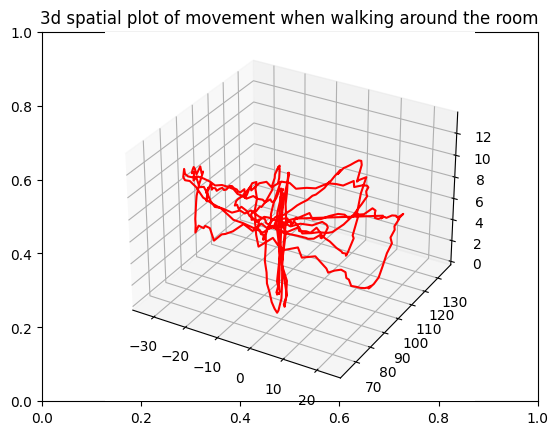

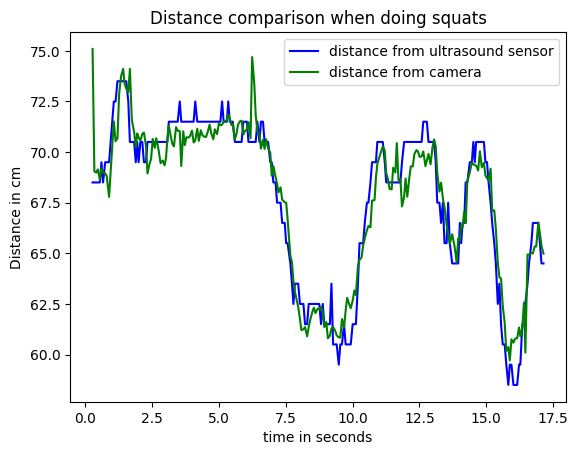

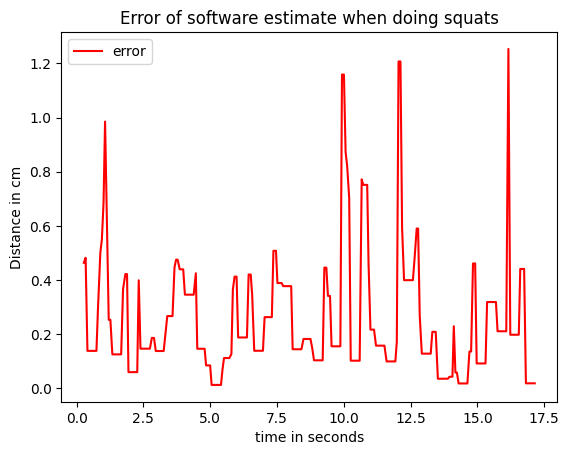

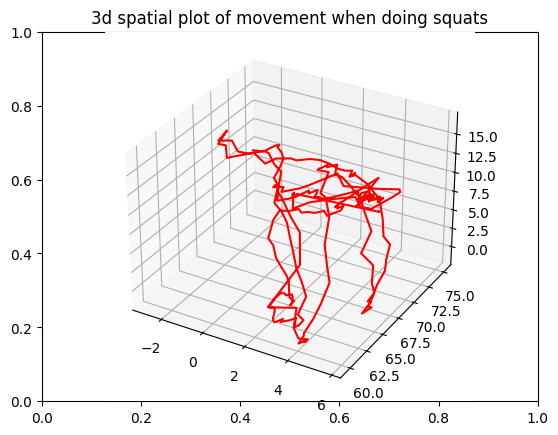

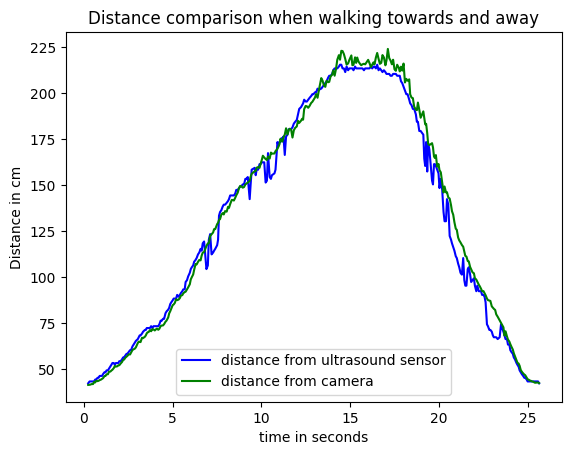

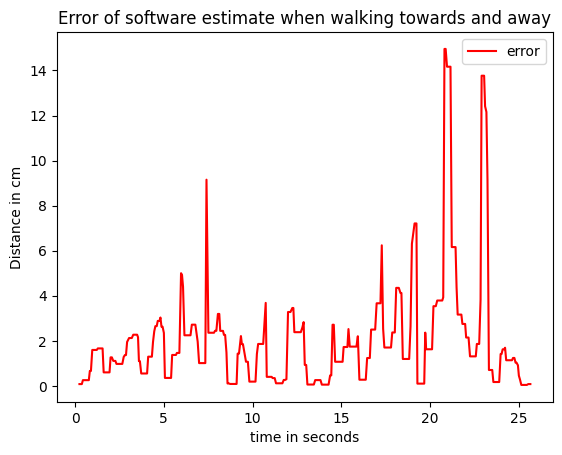

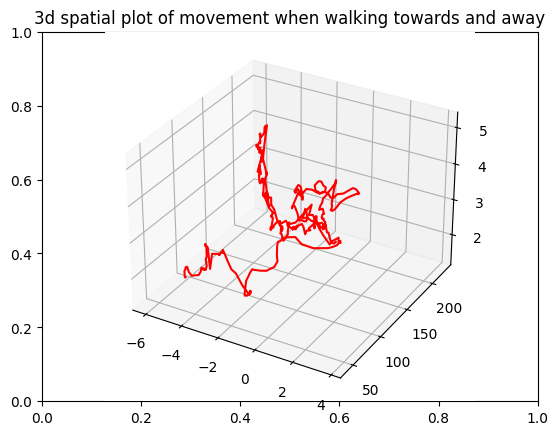

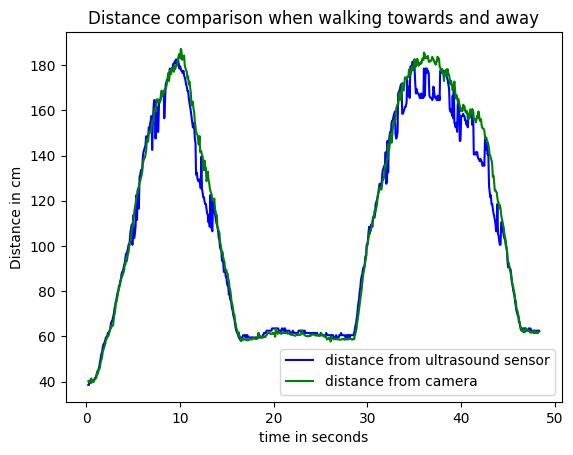

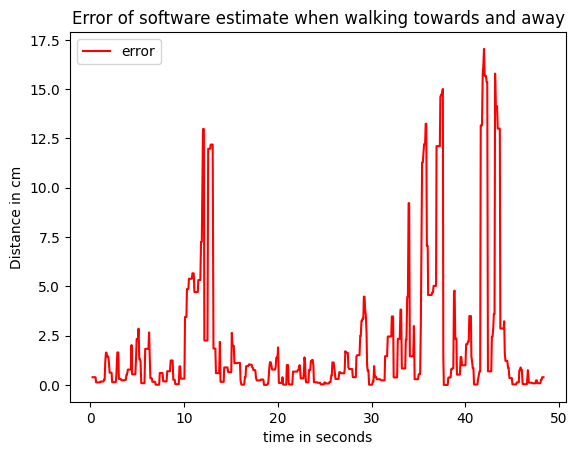

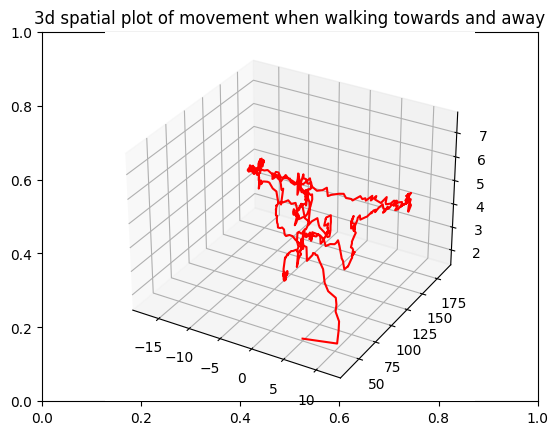

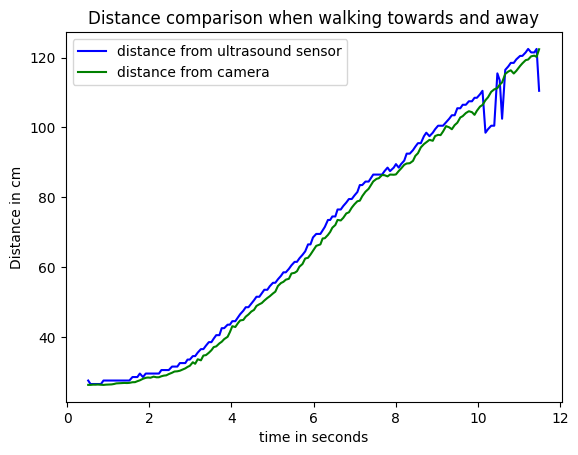

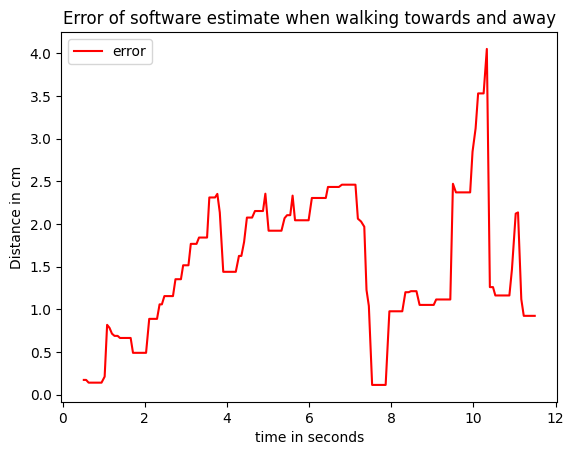

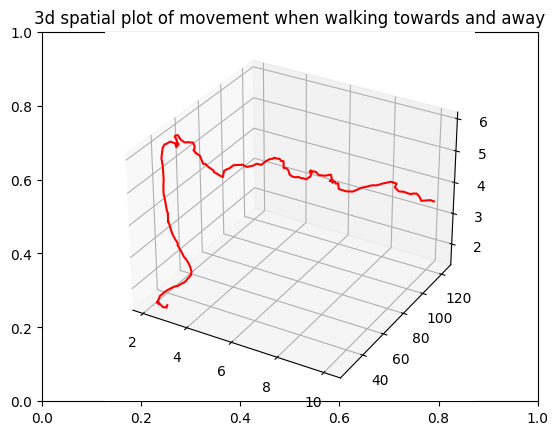

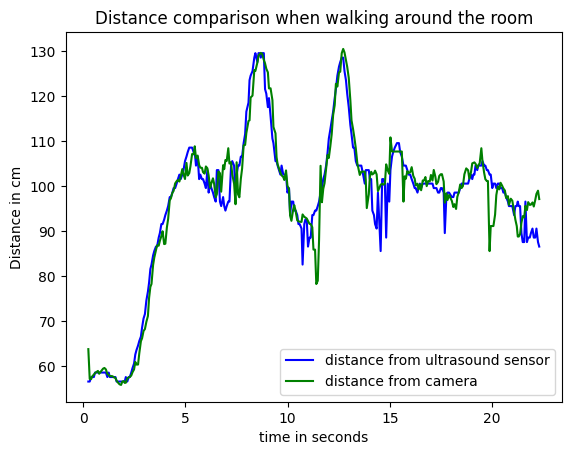

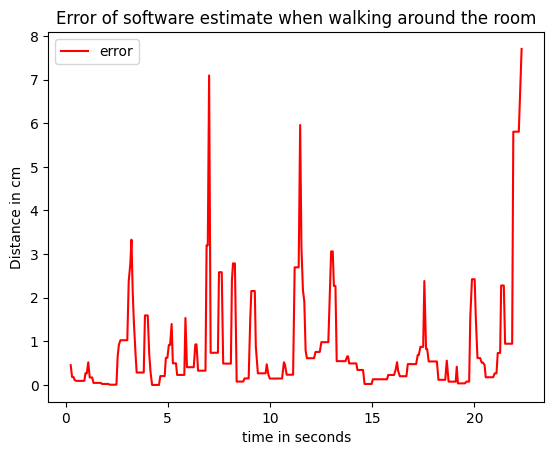

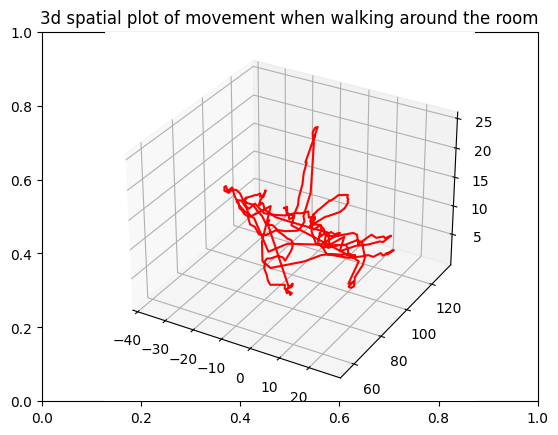

In [8]:
import os
import matplotlib.pyplot as plt
import numpy as np
filenumber = 0

smoothing_interval = 1
errors = []
errors_distance = []
displaygraphs("strafe_main/9cameradistance1", 1, 4.5,0, "walking left and right")
displaygraphs("chaos/13cameradistance1", 2, 4.5,2, "walking around the room")
displaygraphs("squats/11cameradistance1", 2, 4.5,2, "doing squats")
displaygraphs("closein_main/1cameradistance1", 2, 4.5,2, "walking towards and away")

displaygraphs("closein_main/0cameradistance1", 2, 4.5,2, "walking towards and away")
displaygraphs("closein_main/2cameradistance1", 2, 4.5,5, "walking towards and away")
displaygraphs("chaos/12cameradistance1", 2, 4.5,2, "walking around the room")

In [6]:
#print(errors)
print(len(errors))

0


In [7]:
def displaygraphs(filename, numframelag, sensorshift, initialDelete, title):
    # numframelag is how many frames before or after can be picked. During recordings when bluetooth latency was uneven due to interference, it is set higher
    # sensor shift is the thickness of the ultrasound sensor's mounting.
    # initialDelete is how many starting frames to delete because my hand was in front of the sensor to press the button
    seconds = []
    seconds1 = []
    distance = []
    distance1= []
    cdistance = []
    cdistance1= []
    cxcoordinate = []
    cycoordinate = []
    with open(filename) as file: 
        a = file.readlines()
        for k in a:
            s = k.split(",")
            seconds.append(float(s[0]) / 1000)
            cameradist = float(s[-2])
            cxcoordinate.append(float(s[1]))
            cycoordinate.append(float(s[2]))
            cdistance.append(cameradist)
            sensordist = int(s[-1].strip()) + sensorshift
            distance.append(sensordist)
        for i in range(1,int(len(distance) / smoothing_interval)):
            distance1.append(sum(distance[(i-1)*smoothing_interval: i*smoothing_interval]) / smoothing_interval)
            cdistance1.append(sum(cdistance[(i-1)*smoothing_interval: i*smoothing_interval]) / smoothing_interval)                
            seconds1.append(seconds[(i-1)*smoothing_interval])
    newsecs = []
    newdists = []
    newcdists = []
    start = min(seconds)
    for i in range(numframelag):
        newdists.append(0)
    errs = []
    for i in range(len(seconds1)):
        newsecs.append(seconds1[i] - start)
        newdists.append(distance1[i])
        newcdists.append(cdistance1[i])
    for i in range(numframelag):
        newdists.pop(0)
        newsecs.pop(0)
        newcdists.pop(0)
        newdists.pop(-1)
        
    for i in range(initialDelete):
        newdists.pop(0)
        newsecs.pop(0)
        newcdists.pop(0)
    for i in range(len(newsecs)):
        currenterr = 200
        maxheight = 0
        for j in range(-3,3):
            try:
                currenterr = min(currenterr, abs(newcdists[i + j] - newdists[i + j]))
                maxheight = max(maxheight, newdists[i+j])
            except:
                continue
        errs.append(currenterr)
        if(maxheight <= 150):
            errors.append(currenterr) # saves the error and distance the error occured at up to a distance of 5 feet.
            errors_distance.append(maxheight)
        
    sdistline, = plt.plot(newsecs, newdists, color="blue")
    cdistline, = plt.plot(newsecs, newcdists, color="green")
    
    
    plt.title("Distance comparison when " + title)
    plt.ylabel('Distance in cm')
    plt.xlabel('time in seconds')
    plt.legend([sdistline, cdistline], ['distance from ultrasound sensor', 'distance from camera'])
    plt.show()   
    
    errorline, = plt.plot(newsecs, errs, color="red")
    plt.title("Error of software estimate when " + title)
    plt.ylabel('Distance in cm')
    plt.xlabel('time in seconds')
    plt.legend([errorline], ['error'])
    plt.show()       
    for i in range(initialDelete):
        cxcoordinate.pop(0)
        cycoordinate.pop(0)
        cdistance.pop(0)
    plotin3d(cxcoordinate, cycoordinate, cdistance, title)

In [4]:
def plotin3d(arrx, arry, arrz, title):
    # function to generate 3d scatter plot
    fig = plt.figure()
    plt.title("3d spatial plot of movement when " + title)
    ax = fig.add_subplot(projection='3d')
    arrx1 = np.array(arrx)
    arry1 = np.array(arry)
    arrz1 = np.array(arrz)

    ax.plot(arrx1, arrz1, arry1, c='red')
    plt.show()

In [5]:
print(len(errors))

0


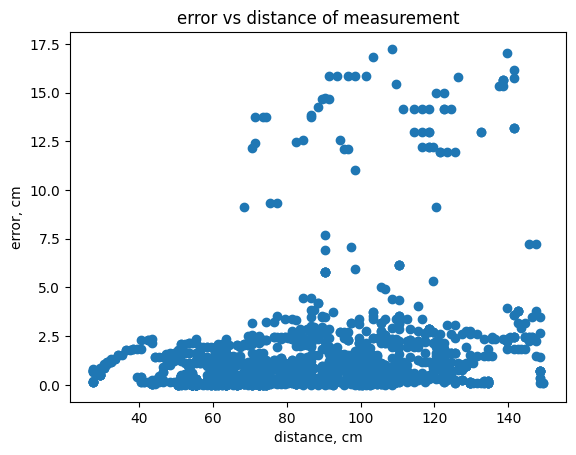

In [9]:
plt.scatter(errors_distance, errors) # generates scatter plot of errors
plt.title("error vs distance of measurement")
plt.ylabel("error, cm")
plt.xlabel("distance, cm")
plt.show()

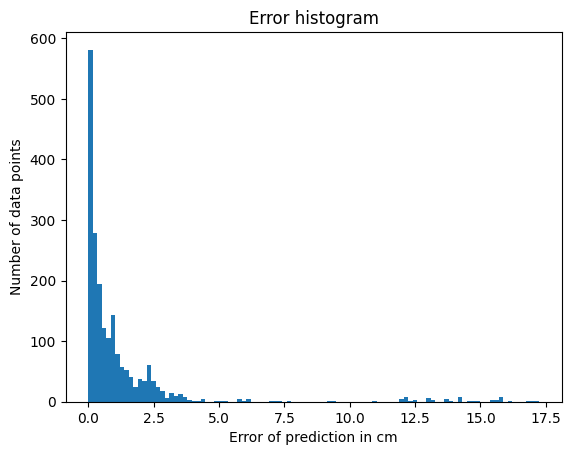

In [10]:
plt.hist(errors, 100) # generates histogram
plt.title("Error histogram")
plt.xlabel("Error of prediction in cm")
plt.ylabel("Number of data points")
plt.show()

In [11]:
es = sorted(errors)


average = sum(es) / len(es)
stdsum = 0

for i in es:
    stdsum += (i - average) ** 2
stdsum /= len(es)
stddev = stdsum ** 0.5
    
print("mean error: " + str(average))
print("Median error: " + str(es[int(len(es) / 2)]))
print("Standard deviation: " + str(stddev))
print("10% worst case: " + str(es[int(len(es) * 9/10)])) # calculate 10% worst case
print("5% worst case: "+ str(es[int(len(es) * 19/20)])) #5% worst case
print("1% worst case: " + str(es[int(len(es) * 99/100)])) #1% worst case

mean error: 1.2446534206170308
Median error: 0.48206605111188594
Standard deviation: 2.4783643296786098
10% worst case: 2.4572874660927084
5% worst case: 3.5990308423853037
1% worst case: 14.677349817058044
